<a href="https://colab.research.google.com/github/kellykhalil23/Stroke-Prediction/blob/main/Stroke.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!git clone https://github.com/kellykhalil23/Stroke-Prediction.git

fatal: destination path 'Stroke-Prediction' already exists and is not an empty directory.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
df= pd.read_csv('/content/Stroke-Prediction/Stroke_data.csv')

In [6]:
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [7]:
df.shape

(5110, 12)

In [8]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


In [12]:
df['age'].describe()


,age
count,5110.000000
mean,43.226614
std,22.612647
min,0.080000
25%,25.000000
50%,45.000000
75%,61.000000
max,82.000000


In [13]:
df['gender'].value_counts()

,count
gender,
Female,2994
Male,2115
Other,1


In [14]:
df['work_type'].value_counts()

,count
work_type,
Private,2925
Self-employed,819
children,687
Govt_job,657
Never_worked,22


In [15]:
df['Residence_type'].value_counts()

,count
Residence_type,
Urban,2596
Rural,2514


In [16]:
df['smoking_status'].value_counts()

,count
smoking_status,
never smoked,1892
Unknown,1544
formerly smoked,885
smokes,789


In [17]:
df['ever_married'].value_counts()

,count
ever_married,
Yes,3353
No,1757


In [18]:
print('Minimum age:', df['age'].min())
print('Maximum age:', df['age'].max())


Minimum age: 0.08
Maximum age: 82.0


In [19]:
df[df['age'] < 5.00]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
162,69768,Female,1.32,0,0,No,children,Urban,70.37,NaN,Unknown,1
249,30669,Male,3.00,0,0,No,children,Rural,95.12,18.0,Unknown,0
282,33759,Female,3.00,0,0,No,children,Urban,73.74,16.0,Unknown,0
291,11014,Male,4.00,0,0,No,children,Rural,79.17,20.0,Unknown,0
363,7559,Female,0.64,0,0,No,children,Urban,83.82,24.9,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4990,21743,Male,4.00,0,0,No,children,Urban,85.88,17.7,Unknown,0
5032,67426,Female,1.24,0,0,No,children,Rural,61.94,20.3,Unknown,0
5079,42709,Male,1.72,0,0,No,children,Urban,77.28,17.1,Unknown,0
5089,56714,Female,0.72,0,0,No,children,Rural,62.13,16.8,Unknown,0


In [20]:
df['avg_glucose_level'].value_counts()

,count
avg_glucose_level,
93.88,6
73.00,5
72.49,5
91.85,5
91.68,5
...,...
61.98,1
91.01,1
120.03,1


In [21]:
df['avg_glucose_level'].describe()

,avg_glucose_level
count,5110.000000
mean,106.147677
std,45.283560
min,55.120000
25%,77.245000
50%,91.885000
75%,114.090000
max,271.740000


In [22]:
# If raw mg/dL values
df[df['avg_glucose_level'] >= 200]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
13,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
14,5317,Female,79.0,0,1,Yes,Private,Urban,214.09,28.2,never smoked,1
17,34120,Male,75.0,1,0,Yes,Private,Urban,221.29,25.8,smokes,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5029,66951,Female,72.0,0,0,Yes,Private,Urban,206.49,26.3,never smoked,0
5034,65405,Female,79.0,0,0,No,Private,Urban,253.86,28.8,formerly smoked,0
5035,49773,Female,78.0,0,0,Yes,Private,Urban,203.36,28.7,formerly smoked,0
5061,38009,Male,41.0,0,0,Yes,Private,Urban,223.78,32.3,never smoked,0


In [23]:
df['bmi'].describe()

,bmi
count,4909.000000
mean,28.893237
std,7.854067
min,10.300000
25%,23.500000
50%,28.100000
75%,33.100000
max,97.600000


In [24]:
# Show only age and bmi columns where bmi is missing
missing_bmi = df[df['bmi'].isnull()][['age', 'bmi','id']]
missing_bmi.head()

,age,bmi,id
1,61.0,NaN,51676
8,59.0,NaN,27419
13,78.0,NaN,8213
19,57.0,NaN,25226
27,58.0,NaN,61843


In [25]:
# Filter rows where age is 71 and BMI is not missing
bmi_71 = df[(df['age'] == 71.00) & (df['bmi'].notnull())]

# Calculate the average BMI
average_bmi_71 = bmi_71['bmi'].mean()

print("Average BMI for patients aged 71:", average_bmi_71)


Average BMI for patients aged 71: 30.564150943396225


In [26]:
unknown = df[df['smoking_status']== 'Unknown']
unknown.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1
13,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,25226,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
23,64778,Male,82.0,0,1,Yes,Private,Rural,208.30,32.5,Unknown,1


In [27]:
# Create a copy of your dataframe to work on
df_new = df.copy()


In [28]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [29]:
df_new = df_new.drop(df_new[df_new['gender'] == 'Other'].index)

In [30]:
df_new['gender'].value_counts()

,count
gender,
Female,2994
Male,2115


In [31]:
def replace_nan_bmi(row, df):
    # If BMI is NaN, replace with the average BMI for that age and gender group
    if pd.isna(row['bmi']):
        # Calculate the mean BMI for the specific age and gender
        mean_bmi = df[(df['age'] == row['age']) & (df['gender'] == row['gender'])]['bmi'].mean()
        return mean_bmi
    else:
        return row['bmi']

# Apply the function row by row
df_new['bmi'] = df_new.apply(lambda row: replace_nan_bmi(row, df_new), axis=1)



In [32]:
df['bmi'].describe()

,bmi
count,4909.000000
mean,28.893237
std,7.854067
min,10.300000
25%,23.500000
50%,28.100000
75%,33.100000
max,97.600000


In [33]:
df_new['bmi'].describe()

,bmi
count,5108.000000
mean,28.922548
std,7.730110
min,10.300000
25%,23.700000
50%,28.300000
75%,32.900000
max,97.600000


In [36]:
df_new[df_new['bmi'].isna()]


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2030,38920,Male,0.48,0,0,No,children,Urban,73.02,NaN,Unknown,0


In [37]:
df_new[
    (df_new['gender'] == 'Male') &
    (df_new['age'] >= 0.25) &
    (df_new['age'] <= 0.5) &
    (df_new['bmi'].notna())
]


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1600,40544,Male,0.40,0,0,No,children,Urban,109.56,14.3,Unknown,0
2579,68382,Male,0.32,0,0,No,children,Urban,127.78,20.8,Unknown,0
3859,13857,Male,0.32,0,0,No,children,Urban,89.04,17.8,Unknown,0


In [41]:
# Calculate mean BMI for male babies between 3 to 6 months
kids_bmi_avg = df_new[
    (df_new['gender'] == 'Male') &
    (df_new['age'] >= 0.25) &
    (df_new['age'] <= 0.5) &
    (df_new['bmi'].notna())
]['bmi'].mean()

print("Average BMI for male babies 3-6 months:", kids_bmi_avg)

df_new.loc[df_new['id'] == 38920, 'bmi'] = kids_bmi_avg


Average BMI for male babies 3-6 months: 17.633333333333336


In [42]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5109 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5109 non-null   int64  
 1   gender             5109 non-null   object 
 2   age                5109 non-null   float64
 3   hypertension       5109 non-null   int64  
 4   heart_disease      5109 non-null   int64  
 5   ever_married       5109 non-null   object 
 6   work_type          5109 non-null   object 
 7   Residence_type     5109 non-null   object 
 8   avg_glucose_level  5109 non-null   float64
 9   bmi                5109 non-null   float64
 10  smoking_status     5109 non-null   object 
 11  stroke             5109 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 518.9+ KB


In [40]:
df_new[df_new['bmi'].isna()]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2030,38920,Male,0.48,0,0,No,children,Urban,73.02,NaN,Unknown,0


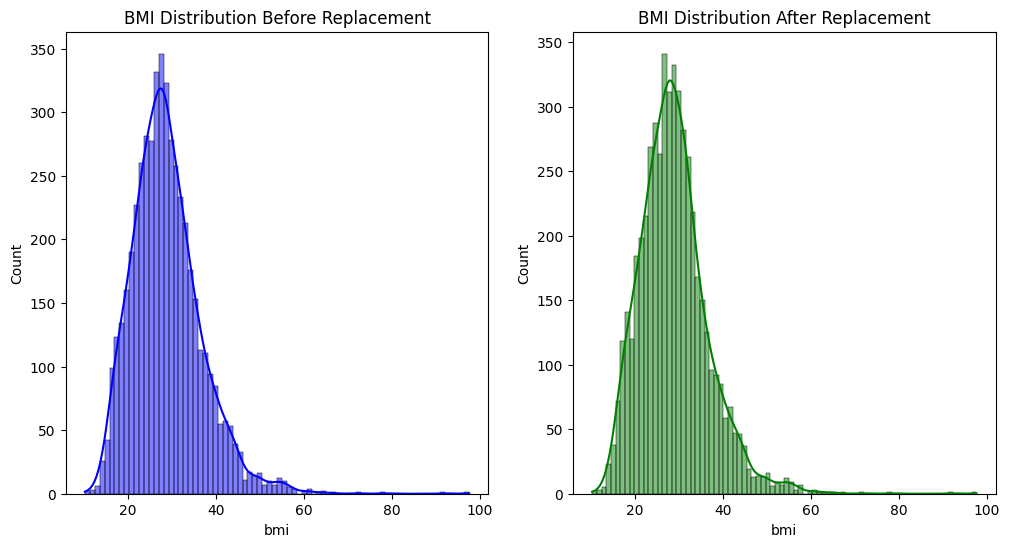

In [43]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['bmi'].dropna(), kde=True, color='blue')
plt.title("BMI Distribution Before Replacement")

plt.subplot(1, 2, 2)
sns.histplot(df_new['bmi'], kde=True, color='green')
plt.title("BMI Distribution After Replacement")

plt.show()


In [35]:
df_new['stroke'].value_counts()

,count
stroke,
0,4860
1,249
